In [1]:
import cirq
import qsimcirq
import numpy as np
from qiskit.visualization import plot_histogram
from encoded.dj import dj

In [3]:

noise_p = 0.01
n_shots = 10000
total_qubits = 10

# define oracle with type = 0 (unbalanced) or 1 (balanced) and define value of oracle (for unbalanced case)
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)
if oracleType == 1:
    oracleValue = np.random.randint(1, 2**(total_qubits-1))

qreg = cirq.LineQubit.range(total_qubits)
circuit, type_, value_ = dj(qreg,oracleType,oracleValue)
circuit.append(cirq.measure(qreg[:total_qubits-1], key="m"))

c_m = circuit.copy()
if noise_p > 0.0:
    c_m = c_m.with_noise(cirq.depolarize(p=noise_p))
s = qsimcirq.QSimSimulator()
samples = s.run(c_m, repetitions=n_shots)
counts = samples.histogram(key="m")
results = {}
for key in counts.keys():
    results[key] = counts[key]

print(circuit)
print("type is " + str(type_) + " value is " + str(value_))
print(results)

                  ┌──┐
0: ───H───H──────────────────M('m')───
                             │
1: ───H───H──────────────────M────────
                             │
2: ───H───H──────────────────M────────
                             │
3: ───H───H──────────────────M────────
                             │
4: ───H───H──────────────────M────────
                             │
5: ───H────────────@─────H───M────────
                   │         │
6: ───H───────@────┼H────────M────────
              │    │         │
7: ───H───H───┼────┼─────────M────────
              │    │         │
8: ───H───H───┼────┼─────────M────────
              │    │
9: ───X───H───X────X──────────────────
                  └──┘
type is 1 value is 12
{12: 7249, 76: 258, 260: 15, 44: 253, 28: 271, 13: 239, 15: 11, 268: 231, 140: 232, 388: 1, 4: 312, 0: 122, 276: 1, 14: 239, 30: 15, 20: 13, 332: 11, 8: 219, 133: 1, 64: 5, 142: 6, 264: 10, 265: 1, 68: 13, 300: 11, 396: 4, 7: 1, 78: 7, 72: 6, 10: 8, 77: 12, 136: 10, 5: 16,

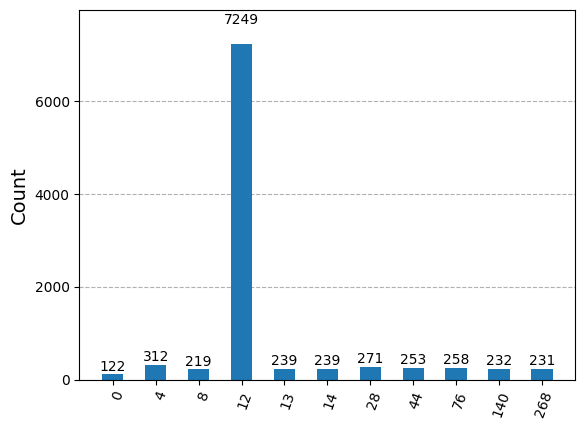

In [4]:
threshold = int(0.01 * n_shots) # the threshold of plotting significant measurements, 1% of the default number of shots, 1024
filteredAnswer = {k: v for k,v in results.items() if v >= threshold} # filter the answer for better view of plots
removedCounts = np.sum([ v for k,v in results.items() if v < threshold ]) # number of counts removed 
plot_histogram(filteredAnswer)